# 数据基本处理、特征工程、特征选择
 - 可以参考的链接：
  - https://blog.csdn.net/weishiym/article/details/79629329
  - https://blog.csdn.net/joycewyj/article/details/51647036
 - 特征工程：使用专业背景知识和技巧处理数据，使得特征能在机器学习算法上发挥更好的作用。
 - 数据仓库搬砖，数据清洗，分析业务/case，找好的特征

In [74]:
import pandas as pd

## 1.数据基本处理
 - head
 - info
 - shape
 - describe

In [21]:
df_train = pd.read_csv('train.csv') # 从当前目录了下读取csv格式的文件

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.2 缺失值处理 的两种方式
 - 法一：pandas fillna
 - 法二：sklearn Imputer

In [10]:
# 查询fillna函数
# help(pd.DataFrame.fillna)

 - value:填充的值
 - method:填充的方法。bfill:用后面backward的值填充到当前缺失的值上。ffill:用前面forward的值填充到当前缺失的值上。

In [24]:
# 现在，我们用年龄的均值，来填充那些年龄缺失的样本
# 先看看原来是怎样的
df_train['Age'][:20]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [12]:
df_train['Age'].mean()

29.69911764705882

In [76]:
fill = df_train['Age'].fillna(value=df_train['Age'].mean())
fill[:20]

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
Name: Age, dtype: float64

 - 接下来 借助sklearn中的Imputer 进行缺失值填充

In [18]:
from sklearn.preprocessing import Imputer
df_train = pd.read_csv('train.csv')

In [20]:
# help(Imputer) # 告诉我们Imputer这个类的一些信息

In [30]:
# 初始化imputer的一个对象
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 
# axis=0指定 填充的是列

In [31]:
# fit读取数据并进行统计计算，transform进行填充
age = imp.fit_transform(df_train[['Age']].values) 

In [32]:
# 将填充的进行赋值
df_train.loc[:,'Age'] = df_train['Age'].fillna(value=df_train['Age'].mean())
# loc是定位函数，逗号左边表示行，用冒号表示所有行；逗号右边表示列，定位在'Age'字段这一列

In [77]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,True
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,5,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2,False


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 2 常见的特征工程操作
### 2.1数值型
### 2.1.1 幅度变换
 - apply + numpy
 - preprocessing scaler

In [49]:
# 取对数等变换
import numpy as np
log_age = df_train['Age'].apply(lambda x:np.log(x))
# apply函数，对‘Age’字段的这一列中的每一个数，我进行这么一个操作： 如果输入x，那么返回np.log(x)

In [54]:
df_train.loc[:,'log_age'] = log_age
# 造一个新的列
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097


In [36]:
# 幅度缩放——最大最小值缩放。有些模型对幅度是比较敏感的，比如 逻辑回归, SVM。
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
fare_trans = mm_scaler.fit_transform(df_train[['Fare']])
fare_trans[:5]

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255]])

In [37]:
# 幅度缩放——标准化
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fare_std_trans = std_scaler.fit_transform(df_train[['Fare']])
fare_std_trans[:5]

array([[-0.50244517],
       [ 0.78684529],
       [-0.48885426],
       [ 0.42073024],
       [-0.48633742]])

### 2.1.2 统计值
 - min, max
 - quantile

In [62]:
# 最大最小值
max_age = df_train['Age'].max()
min_age = df_train['Age'].min()
max_age

80.0

In [63]:
min_age

0.42

In [64]:
# 分位数
age_quarter_1 = df_train['Age'].quantile(0.25)
age_quarter_3 = df_train['Age'].quantile(0.75)
age_quarter_1

22.0

In [65]:
age_quarter_3

35.0

### 2.1.3四则运算

In [67]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586


In [38]:
df_train.loc[:,'family_size'] = df_train['SibSp'] + df_train['Parch'] +1  # SibSp表示兄弟姐妹的人数  Parch表示父母和孩子的个数

In [70]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2


### 2.1.4 高次特征与交叉特征
 - preprocessing.PolynomialFeatures

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [40]:
poly.fit_transform([[2,3]])  # x1,x2的次数分别为：00,10,01,20,11,02

array([[1., 2., 3., 4., 6., 9.]])

### 2.1.5 离散化/分桶/分箱
 - 把一个连续属性变为多个二元属性
 - 为什么需要离散化？公交让座
  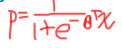
 - pandas cut, qcut
 - 对逻辑回归、线性回归，非常有用


In [86]:
# 等距切分。用5个树桩切成4个区间
df_train.loc[:, 'fare_cut'] = pd.cut(df_train['Fare'], 5)

In [83]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,"(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,"(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,"(-0.512, 102.466]"


In [85]:
df_train['fare_cut'].unique() # 查看有多少个不同的取值

[(-0.512, 102.466], (204.932, 307.398], (102.466, 204.932], (409.863, 512.329]]
Categories (4, interval[float64]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (409.863, 512.329]]

In [88]:
# 等频切分
df_train.loc[:, 'fare_qcut'] = pd.qcut(df_train['Fare'], 5)
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,fare_cut,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,"(-0.512, 102.466]","(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,"(-0.512, 102.466]","(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,"(-0.512, 102.466]","(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,"(-0.512, 102.466]","(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,"(-0.512, 102.466]","(7.854, 10.5]"


## 2.2 类别型
 - onehot encoding/独热向量编码
 - 定性的特征，如果编码为1,2,3,4...会不平等
 - pandas get_dummies
 - sklearn OneHotEncoder

In [89]:
embarked_oht = pd.get_dummies(df_train[['Embarked']])
embarked_oht.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [91]:
fare_qcut_oht = pd.get_dummies(df_train[['fare_qcut']])
fare_qcut_oht.head()

,"fare_qcut_(-0.001, 7.854]","fare_qcut_(7.854, 10.5]","fare_qcut_(10.5, 21.679]","fare_qcut_(21.679, 39.688]","fare_qcut_(39.688, 512.329]"
0,1,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0


## 2.3 时间型
 - 时间型，既有连续的信息，也有离散的信息
### 2.3.1 转为日期类型
 - pandas to_datetime

In [41]:
car_sales = pd.read_csv('car_data.csv') 
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [42]:
car_sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
date_t    1512 non-null object
cnt       1032 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [43]:
car_sales.describe()

,cnt
count,1032.000000
mean,1760.124031
std,1153.164214
min,12.000000
25%,1178.750000
50%,1774.000000
75%,2277.750000
max,7226.000000


In [44]:
# date_t的类型，是object，
# 我们把它转化为python的一个特殊类型：时间型，以便于进行各种操作
car_sales['date_t'].dtype

dtype('O')

In [45]:
car_sales.loc[:,'date'] = pd.to_datetime(car_sales['date_t'])
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 3 columns):
date_t    1512 non-null object
cnt       1032 non-null float64
date      1512 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.5+ KB


In [46]:
car_sales.head() # 从表格上看起来一样，但其实 数据类型不同

,date_t,cnt,date
0,2012-12-31,NaN,2012-12-31
1,2013-01-01,NaN,2013-01-01
2,2013-01-02,68.0,2013-01-02
3,2013-01-03,36.0,2013-01-03
4,2013-01-04,5565.0,2013-01-04


### 2.3.2 取出关键时间信息
 - dt.month
 - dt.day
 - dt.dayofweek
 - 节假日和购物的关系
 - ...

In [48]:
# 比如几月份，上中下旬，星期几 etc
car_sales.loc[:,'month'] = car_sales['date'].dt.month
car_sales.loc[:,'dom'] = car_sales['date'].dt.day
car_sales.loc[:,'doy'] = car_sales['date'].dt.dayofyear
car_sales.loc[:,'dow'] = car_sales['date'].dt.dayofweek
car_sales.head()

,date_t,cnt,date,month,dom,doy,dow
0,2012-12-31,NaN,2012-12-31,12,31,366,0
1,2013-01-01,NaN,2013-01-01,1,1,1,1
2,2013-01-02,68.0,2013-01-02,1,2,2,2
3,2013-01-03,36.0,2013-01-03,1,3,3,3
4,2013-01-04,5565.0,2013-01-04,1,4,4,4


In [115]:
car_sales.loc[:,'is_weekend'] = car_sales['dow'].apply(lambda x: 1 if (x==0 or x==6) else 0)
car_sales.head()

,date_t,cnt,data,date,month,dom,doy,dow,is_weekend
0,2012-12-31,NaN,2012-12-31,2012-12-31,12,31,366,0,1
1,2013-01-01,NaN,2013-01-01,2013-01-01,1,1,1,1,0
2,2013-01-02,68.0,2013-01-02,2013-01-02,1,2,2,2,0
3,2013-01-03,36.0,2013-01-03,2013-01-03,1,3,3,3,0
4,2013-01-04,5565.0,2013-01-04,2013-01-04,1,4,4,4,0


## 2.4 文本型
### 2.4.1 词袋/bag of words
 - CountVectorizer
 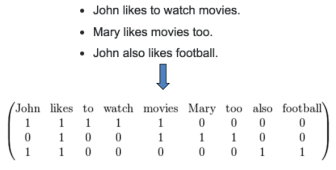
 - -->词库-->映射系数向量

In [49]:
from sklearn.feature_extraction.text import CountVectorizer # 计数器的向量化的处理器
vectorizer = CountVectorizer()
corpus = [
    'This is a very good tool',
    'we are very very very good',
    'This is the third sentence',
    'Is this the last word'
]

In [50]:
X = vectorizer.fit_transform(corpus)
X

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [51]:
# 获取字典/词表，是按照字典序排序
vectorizer.get_feature_names()

['are',
 'good',
 'is',
 'last',
 'sentence',
 'the',
 'third',
 'this',
 'tool',
 'very',
 'we',
 'word']

In [52]:
X.toarray() # 4个12维的向量

array([[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]], dtype=int64)

### 2.4.2 词袋中的词扩展到n-gram
 - 这样就能记录词汇顺序

In [53]:
vec = CountVectorizer(ngram_range=(1,3)) # 1,2,3个词相邻的都作为一个词
X_ngram = vec.fit_transform(corpus)
vec.get_feature_names() # 对象: get feature name

['are',
 'are very',
 'are very very',
 'good',
 'good tool',
 'is',
 'is the',
 'is the third',
 'is this',
 'is this the',
 'is very',
 'is very good',
 'last',
 'last word',
 'sentence',
 'the',
 'the last',
 'the last word',
 'the third',
 'the third sentence',
 'third',
 'third sentence',
 'this',
 'this is',
 'this is the',
 'this is very',
 'this the',
 'this the last',
 'tool',
 'very',
 'very good',
 'very good tool',
 'very very',
 'very very good',
 'very very very',
 'we',
 'we are',
 'we are very',
 'word']

In [54]:
X_ngram.toarray() # fit transform生成的：toarray

array([[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

### 2.4.3 TF-IDF 
 - TfidfVectorizer 计算出权重
 - 为了让计算机明白每个词的重要性
 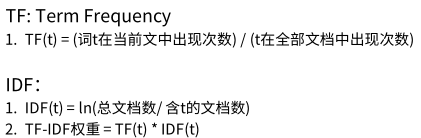

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf_x = tfidf_vec.fit_transform(corpus)

In [133]:
tfidf_vec.get_feature_names()

['are',
 'class',
 'doc',
 'good',
 'is',
 'last',
 'sentence',
 'students',
 'the',
 'third',
 'this',
 'very']

In [134]:
tfidf_x.toarray()  # 如果是0表明没有出现，如果非零，还会给出重要程度

array([[0.        , 0.57184829, 0.        , 0.45085176, 0.36500336,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36500336, 0.45085176],
       [0.3488765 , 0.        , 0.        , 0.27505824, 0.        ,
        0.        , 0.        , 0.3488765 , 0.        , 0.        ,
        0.        , 0.82517473],
       [0.        , 0.        , 0.        , 0.        , 0.34432086,
        0.        , 0.53944516, 0.        , 0.42530476, 0.53944516,
        0.34432086, 0.        ],
       [0.        , 0.        , 0.53944516, 0.        , 0.34432086,
        0.53944516, 0.        , 0.        , 0.42530476, 0.        ,
        0.34432086, 0.        ]])

### 2.4 词向量
 - word2vec， 稠密

## 2.5 其它类型_组合特征
### 2.5.1 简单组合特征，拼接型

In [55]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [59]:
# 借助条件去 获取 组合特征
df_train.loc[:,'alone'] = (df_train['SibSp']==0)&(df_train['Parch']==0) 
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True


### 2.5.2 模型特征组合
 - 用树模型（比如GBDT 梯度提升决策树）产出特征组合路径
 - 组合特征和原始特征一起放进LR训练

## 3. 特征选择
 - 为什么要进行特征选择：
  - 冗余：部分特征的相关度太高，消耗计算性能
  - 噪声：部分特征是预测结果有负影响
 - 一般来说，从两个方面考虑选择特征：
  - 特征是否发散。若不发散，比如方差接近于0，表明样本在这个特征上基本没有差异。
  - 特征与目标的相关性。与目标相关性高的特征，应当优先选择。
 - 特征选择 VS 降维
  - 降维本质上是从一个维度空间映射到另一个维度空间
  - 特征选择就是单纯地从提取到的所有特征中选择部分特征作为训练集特征
  
### 3.1 过滤式/Filter
 - 方差选择法：VarianceThreshold
 - 相关系数法：SelectKBest
 - 结合卡方检验：SelectKBest + chi2
 - 最大信息系数法：SelectKBest + MINE
 - 具体可以参见这个博客：https://blog.csdn.net/weishiym/article/details/79629329

In [62]:
from sklearn.feature_selection import SelectKBest # 从每个单特征从选择最好的K个
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
y[:5]

array([0, 0, 0, 0, 0])

In [64]:
X.shape

(150, 4)

In [65]:
#计算相关系数，发现倒数两列的与y的相关度是最高的
X_new = SelectKBest(k=2).fit_transform(X,y) # 基于我的X，y
X_new.shape

(150, 2)

In [66]:
X_new[:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

 - 过滤式的缺点：针对的是单个特征，没有考虑特征之间的关联作用

### 3.2 包裹型/wrapper
 - 把特征选择看做  特征子集搜索问题，筛选各种特征子集，用模型评估效果
 - 递归特征消除法 RFE
 - 比如使用LR：
  1. 用全量特征跑一个模型
  2. 根据线性模型的系数（体现相关性），删除掉5-10%的弱特征，观察准确率/AUC（模型性能度量）的变化
  3. 逐步进行，直至准确率/AUC出现大的下滑

In [67]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=2) # 用来做评估的模型是rf，最终要选出2个特征
X_rfe = rfe.fit_transform(X,y)
X_rfe.shape

(150, 2)

In [68]:
X_rfe[:5,:] # 选出的特征恰好与 过滤型 的方法一致

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### 3.3 嵌入式/Embedded
 - 根据模型来分析特征的重要性。
 - 最常见：用正则化方式来做特征选择。
 - SelectFromModel 使用带惩罚项的基模型

In [73]:
# 最常用的是 逻辑回归，lenear SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
# help(LinearSVC)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y) # L1惩罚项
model = SelectFromModel(lsvc, prefit=True)
X_embed = model.transform(X)
X_embed.shape

(150, 3)

In [72]:
X_embed[:5,:]  # 可见选出了前三个特征

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])